In [32]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# https://www.leozqin.me/using-machine-learning-to-classify-the-quality-of-wine/
# https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine

## Data Loading

Load the CSV file and look at the top 5 rows.

Seperate the csv file formating with a semi colunm

In [33]:
wwine = pd.read_csv("./data/winequality-white.csv", sep=';')
wwine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


Check to missing values

In [34]:
wwine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Get information and description of our dataset

In [35]:
wwine.info()
wwine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Lets check our value counts for quality colunm

In [36]:
wwine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

## Data Pre-Processing

Using Classification: We are trying to find if a wine is Poor, Average or Excellent. We can adapt our quality colunm to by dividing our dataset into 3 classes. Poor: all wines with quality below 4.
Average: wines with quality 5 and 6.
Excellent: wines with quality higher than 7.

To do that, we will create another colunm called class and return either poor, average or good based on the quality

In [47]:
labels = ["poor", "average", "excellent"]
wwine['class'] = pd.cut(wwine['quality'], bins = 3, labels = labels)
wwine['class'].value_counts()

average      3078
poor         1640
excellent     180
Name: class, dtype: int64

Lets convert the labels to numerical values from categorical

In [50]:
wwine['class'] = pd.cut(wwine['quality'], bins = 3, labels = False)
wwine['class'].value_counts()

1    3078
0    1640
2     180
Name: class, dtype: int64

Lets check for correlation between all the colunms

In [55]:
# drop quality and class and check correlations between class and the rest of the colunms
correlations = wwine.corr()['class'].drop(['quality', 'class'])
correlations

fixed acidity          -0.094110
volatile acidity       -0.200274
citric acid            -0.004063
residual sugar         -0.092725
chlorides              -0.187810
free sulfur dioxide     0.004229
total sulfur dioxide   -0.171998
density                -0.280381
pH                      0.089337
sulphates               0.043495
alcohol                 0.404036
Name: class, dtype: float64

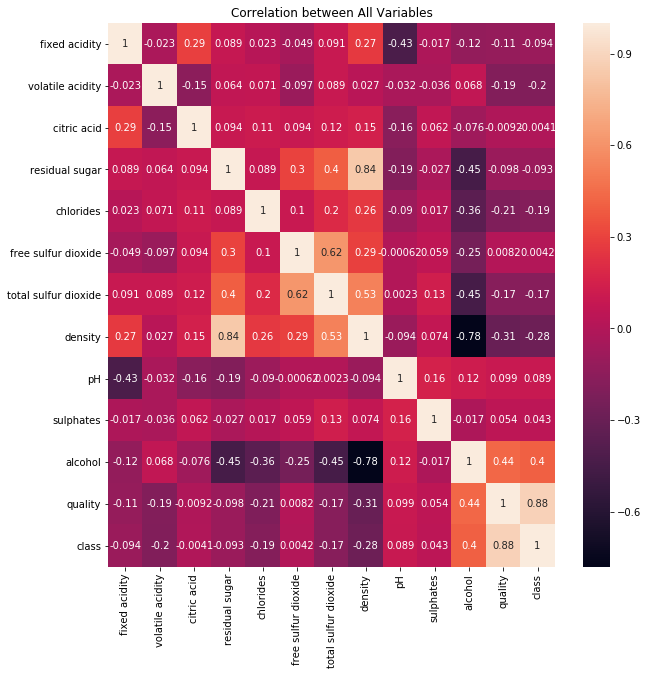

In [56]:
# sns.heatmap(wwine.corr())
corr = wwine.corr()
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr,ax=ax, annot= True)
ax.set_title('Correlation between All Variables')
plt.show()

Next we create a training and test dataset

In [62]:
X = wwine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = wwine['class']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.33,random_state=123)

In [63]:
#  lets use standard scale to scale the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [59]:
[subset.shape for subset in [data_train,data_test,target_train,target_test]]

[(3281, 11), (1617, 11), (3281,), (1617,)]

# Training our Classifiers Models

We be using DecisionTreeClassifier, GradientBoostingClassifier, RandomForestClassifier and 

In [60]:
models = []
models.append(('RandomForest', RandomForestClassifier(n_estimators=100)))
models.append(('NaiveBayes', GaussianNB()))
models.append(('GradientDescent', SGDClassifier()))
models.append(('SupportVectorClassifier', SVC(gamma='scale')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecisionTree', DecisionTreeClassifier()))

In [ ]:
for name,model in models:
    kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2)
    results = model_selection.cross_val_score(model, X_train, y_train, cv= kfold, scoring = 'accuracy')
    msg  = "%s: %f" % (name, results.mean())
    print(msg)